### 【問題1】不純度を求める関数
ノード の ジニ不純度 を計算する関数を作成してください。<br>
ノード $t$ に対するジニ不純度 $I(t)$ は以下の数式で求まります。クラスが混じり合っているほどジニ不純度は高くなります。<br>
<br>
　　　　$ I(t) = 1 - \displaystyle\sum_{i=1}^{K}P^2(C_i|t) = 1 - \displaystyle\sum_{i=1}^{K}\displaystyle(\frac{N_{t,i}}{N_{t,all}})^2 $<br>
<br>
　　　　$ t $ : ノードのインデックス<br>
　　　　$ i $ : クラスのインデックス<br>
　　　　$ K $ : クラスの数<br>
　　　　$ C_i $ : i番目のクラス<br>
　　　　$ P(C_i|t) $ :　t番目のノードにおける$C_i$の割合<br>
　　　　$ N_{t,i} $ : t番目のノードのi番目のクラスに属するサンプル数<br>
　　　　$ N_{t,all} $ : t番目のノードのサンプルの総数<br>
<br>
まずは簡単な例を作り、手計算と関数の結果を比較してください。<br>
<br>
《例》<br>
クラス1:サンプル数15, クラス2:サンプル数15 → ジニ不純度0.500<br>
クラス1:サンプル数15, クラス2:サンプル数15, クラス3:サンプル数15 → ジニ不純度0.667<br>
クラス1:サンプル数18, クラス2:サンプル数12 → ジニ不純度0.480<br>
クラス1:サンプル数30, クラス2:サンプル数0 → ジニ不純度0.000<br>


In [3]:
import numpy as np

y_1 = np.array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2])
y_2 = np.array([1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3])
y_3 = np.array([1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2])
y_4 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


def gini_diversity_index(y):
    classes = np.unique(y)
    gini = 0
    for i in classes:
        gini += ((len(y[y == i])/len(y)) ** 2)
    gini = 1 - gini
    return gini

gini_1 = gini_diversity_index(y_1)
gini_2 = gini_diversity_index(y_2)
gini_3 = gini_diversity_index(y_3)
gini_4 = gini_diversity_index(y_4)

print("y_1:{}".format(gini_1))
print("y_2:{:.3f}".format(gini_2))
print("y_3:{:.3f}".format(gini_3))
print("y_4:{:.3f}".format(gini_4))


y_1:0.5
y_2:0.667
y_3:0.480
y_4:0.000


### 【問題2】情報利得を求める関数
次に、ノード間の 情報利得 を計算する関数を作成してください。問題1で作成したジニ不純度 $ I(t) $ を計算する関数を呼び出して使います。<br>
情報利得 $ IG $ は以下の数式で求まります。うまく分けられている時ほど情報利得は大きくなります。<br>

ここで分岐は2つのみであるため、分岐先を「左側のノード・右側のノード」と呼びます。<br>
<br>
　　　　$ IG(p) = I(p) - \displaystyle\frac{N_{left,all}}{N_{p,all}}I(left) - \displaystyle\frac{N_{right,all}}{N_{p,all}}I(right) $<br>
<br>
　　　　$ p $ : 親ノードを示すインデックス<br>
　　　　$ left $ : 左側のノードを示すインデックス<br>
　　　　$ right $ : 右側のノードを示すインデックス<br>
<br>
まずは簡単な例を作り、手計算と関数の結果を比較してください。<br>
<br>
《例》<br>
左ノードクラス1:サンプル数10, 左ノードクラス2:サンプル数30, 右ノードクラス1:サンプル数20, 右ノードクラス2:サンプル数5 → 情報利得0.143<br>


In [17]:
import numpy as np

left_y_1 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
left_y_2 = np.array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ])
right_y_3 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
right_y_4 = np.array([2, 2, 2, 2, 2])

def gini_diversity_index(y):
    classes = np.unique(y)
    gini = 0
    for i in classes:
        gini += ((len(y[y == i])/len(y)) ** 2)
    gini = 1 - gini
    return gini

def information_gain(left_node, right_node):
    all_node = np.concatenate([left_node, right_node])

    gini = gini_diversity_index(all_node)
    left_gini = gini_diversity_index(left_node)
    right_gini = gini_diversity_index(right_node)

    print(len(left_node))
    print(len(right_node))
    print(len(all_node))
    
    ig = gini - (len(left_node)/len(all_node)*left_gini) - (len(right_node)/len(all_node)*right_gini)

    return ig

print("IG:{:.3f}".format(ig))

IG:0.143


### 【問題3】学習
空間の分割を行い、決定木のグラフを生成するコードを作成してください。今は深さ1の決定木なので、分割を1回だけ行います。ここでグラフを生成するとは、1回の分割の際の条件としてどの特徴量がいくつ以上の時とするかを求めるということです。<br>

訓練データに対してすべての組み合わせの分割を行い、その中でノード間の情報利得が最大となる分割をそのノードの分割基準として記録します。<br>

クラスが混ざらない不純度が0のノード、または指定された深さのノードが 葉ノード となります。葉ノードにはクラスを記録しておき、これを推定時に分類するクラスとします。クラスが混ざらない場合はそのままのクラスを記録し、混ざっている場合は多数決により決めます。<br>

《組み合わせの取り方》<br>
すべての組み合わせの取り方は、最も単純には各特徴量の値自体をしきい値にして分割を行う方法があります。片側の端は今回のスクラッチはこの方法で行なってください。<br>

他には中間の値をしきい値にする方法もあり、scikit-learnではこの方法が用いられています。<br>

《補足》<br>

問題2の情報利得を計算する関数はこの問題3で利用する上では、親ノードの不純度 $I(p)$ は固定されるため、左右のノードの不純度の合計を計算するだけでも同じ結果が得られることになります。しかし、ここでは親ノードを考慮した情報利得を計算する実装を行なってください。<br>


### 【問題4】推定
推定する仕組みを実装してください。ScratchDecesionTreeClassifierDepth1クラスの雛形に含まれるpredictメソッドに書き加えてください。<br>

入力されたデータの値を学習した条件で判定していき、どの葉ノードに到達するかを見ます。葉ノードにはクラスが記録されているので、これが推定値となります。<br>

### 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したシンプルデータセット2の2値分類に対してスクラッチ実装の学習と推定を行なってください。<br>

scikit-learnによる実装と比べ、正しく動いているかを確認してください。<br>

AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。<br>

In [58]:
import numpy as np
import scipy.stats as stats
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装
    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose

        
    def gini_diversity_index(self, y):
        classes = np.unique(y)
        gini = 0
        for i in classes:
            gini += ((len(y[y == i])/len(y)) ** 2)
        gini = 1 - gini
        return gini

    
    def information_gain(self, X, y):
        all_node = len(X)

        gini = self.gini_diversity_index(y)
        left_gini = self.gini_diversity_index(self.y_left)
        right_gini = self.gini_diversity_index(self.y_right)

        ig = gini - (len(self.X_left)/all_node * left_gini) - (len(self.X_right)/all_node * right_gini)

        return ig


    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        self.list_gini_info_max = []
        self.threshold_max = []

        # 列毎かつ行のユニークな値（計算が減る）でループ
        for i in range(X.shape[1]):
            self.list_gini_info = [] # 情報利得用のリスト
            self.Threshold = []
            for j in np.unique(X[:,i]):
                # 対象の列内の一意な値を配列へ格納していく
                self.Threshold.append(j)
                # 特徴量を閾値にして、2つのノード（左と右）へ親ノードを分割
                self.X_right = X[X[:,i] >= j]
                self.y_right = y[X[:,i] >= j]
                self.X_left = X[X[:,i] < j]             
                self.y_left = y[X[:,i] < j]
                # 分割した親と子で情報利得を計算し、リストへ保管
                self.list_gini_info.append(self.information_gain(X, y))

            # 情報利得のリストから最大となる情報利得を取得
            self.list_gini_info_max.append(max(self.list_gini_info))
            # 取得した最大となる情報利得を出せる列を特定（どの列を分割基準とするかが分かる）
            self.ind = self.list_gini_info.index(max(self.list_gini_info))
            # 取得したインデックス（＝列）から、情報利得が最大になる特徴量の値を取得
            self.threshold_max.append(self.Threshold[self.ind])

        # 各列毎の最大利得の中から最大の利得となる列のインデックスを取得　→　どの列を使って分割するのが良いかを決める
        self.ind2 = self.list_gini_info_max.index(max(self.list_gini_info_max)) # 1
        # 取得したインデックス（＝列番号）から情報利得が最大になる特徴量の値を取得
        self.dicision_threshold = self.threshold_max[self.ind2] # 1.8
        # 情報利得が最大となる列とその中で分割(ここでは右と左)する値が分かったので、その値で特徴量を分割し、最も多いyの値を取得
        # 該当の特徴量でself.dicision_threshold(=1.8)以上の値を持つyの中で最も多い値をself.Greater_labelとする（0）
        # self.Greater_label = stats.mode(y[X[:,self.ind2] >= self.dicision_threshold]) # ModeResult(mode=array([[0]]),count=array([[49]]))
        self.Greater_label = stats.mode(y[X[:,self.ind2] >= self.dicision_threshold]).mode # 0
        # 該当の特徴量でself.dicision_threshold(=1.8)未満の値を持つyの中で最も多い値をself.Less_labelとする（1）
        # self.Less_label = stats.mode(y[X[: ,self.ind2] < self.dicision_threshold]) # ModeResult(mode=array([[1]]),count=array([[44]]))
        self.Less_label = stats.mode(y[X[: ,self.ind2] < self.dicision_threshold]).mode # 1

#         if self.verbose:
#             #verboseをTrueにした際は学習過程を出力
#             print()
#         pass

    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        self.y_pred = np.zeros(X.shape[0]).reshape(X.shape[0], 1)
        # 情報利得が最大となるXの列と行の値(self.dicision_threshold)でデータを分割（self.dicision_threshold以上か未満か）し、
        # 学習した結果（self.dicision_threshold以上はself.Greater_labelとする、self.dicision_threshold以上はself.Less_labelとする）
        # を反映させた「y_pred」を作成して戻り値とする
        self.y_pred[X[:, self.ind2] >= self.dicision_threshold] = self.Greater_label
        self.y_pred[X[:, self.ind2] < self.dicision_threshold] = self.Less_label
        return self.y_pred


In [59]:
# X = np.array([
#     [-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
#     [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
#     [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
#     [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
#     [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
#     [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
#     [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
#     [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
#     [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
#     [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
#     [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
#     [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
#     [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
#     [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
#     [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
#     [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
#     [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
#     [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
#     [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
#     [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ],
# ])
# y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
#        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
iris = load_iris()
X = iris.data[50:,:]
y = iris.target[50:]
X = X[:,[2,3]]
y = np.where(y == 1, 1, 0)
y = y.reshape(100,1)
iris = np.hstack((y,X))
np.unique(iris[:,0])

sdtcd1 = ScratchDecesionTreeClassifierDepth1()
sdtcd1.fit(X, y)
# sdtcd1.predict(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y_pred = sdtcd1.predict(X_test)

print("{}".format(precision_score(y_test,y_pred)))
print("{}".format(recall_score(y_test,y_pred)))
print("{}".format(f1_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))

1
1.8
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]
 [4.6 1.4]
 [4.  1.2]
 [3.3 1. ]
 [4.2 1.3

### 【問題6】決定領域の可視化
決定領域を可視化してください。<br>


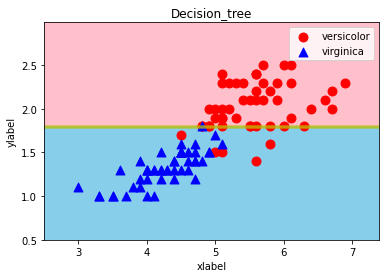

In [51]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches


def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):

    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    marker = ["o", "^"]

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker=marker[i])
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()



decision_region(X = X, y = y[:,0], model = sdtcd1, step=0.01, title='Decision_tree', xlabel='xlabel', ylabel='ylabel')
